In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.io

plt.rcParams['figure.figsize'] = [15,7.5]

In [2]:
data = scipy.io.loadmat('./YaleFaceDataBase/Yale_64x64.mat')

In [3]:
# Taking Last 15 images for testing

X_test = np.array(data['fea'])[150:,:]      

In [4]:
# Taking frist 149 images for training
X = np.array(data['fea'])[:150,:]

In [5]:
print(X.shape)

(150, 4096)


In [6]:
XtX = X.T.dot(X)

In [7]:
print(XtX.shape)


(4096, 4096)


In [8]:
eigValues, eigVectors = np.linalg.eigh(XtX)

In [9]:
print(eigValues.shape)

(4096,)


In [10]:
print(eigValues[4000:])

[ -95.87212583 -100.23644794 -127.99262187 -137.39960762 -132.10364213
  159.40355341  111.06792481  126.48589776 -198.88613088  -68.82417363
  -85.54853915  -74.81482552  170.06367595  -82.1587862   106.48448469
  151.7299468   150.42988325  144.50049669  134.09314361  139.77671115
  129.47823944  -61.97693222  -65.01130052 -156.48923597 -158.18961839
  -99.51909773 -146.39034163  -79.61817018 -154.08923022  -56.1070764
   44.47717395   51.92870949   88.11452636   74.7856489    68.77857824
   63.1354954  -147.58485533  156.98305335  138.48005272  103.5589881
   97.66886299   69.30765283   41.03277983   29.72187612   28.32743261
   35.11847552   93.82716803   81.51166916  -45.43461805   56.24648981
  -43.76273099  -51.18773687   -8.28296498   38.09557232  -38.79502026
  -24.1575199   -29.96183426  -26.71908105  -78.08851094  -12.79548755
   14.23275554    7.96137492    4.18964189    1.56106279   -1.27337026
   80.58561446   57.74038968   59.8311609   -52.34852263   16.27864825
   23.10

In [9]:
idx = eigValues.argsort()[::-1]   
eigValues = eigValues[idx]
eigVectors = eigVectors[:,idx]

/home/deshabhakt/.local/lib/python3.9/site-packages/numpy/core/_asarray.py:102: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


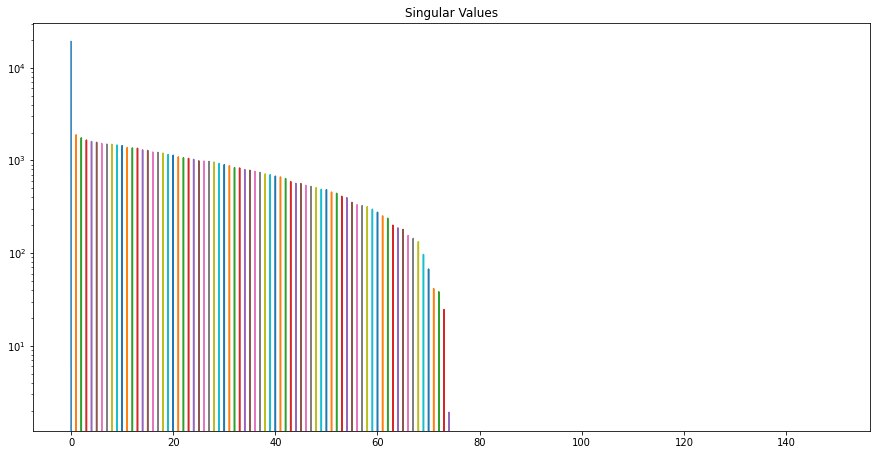

/home/deshabhakt/.local/lib/python3.9/site-packages/numpy/core/_asarray.py:102: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


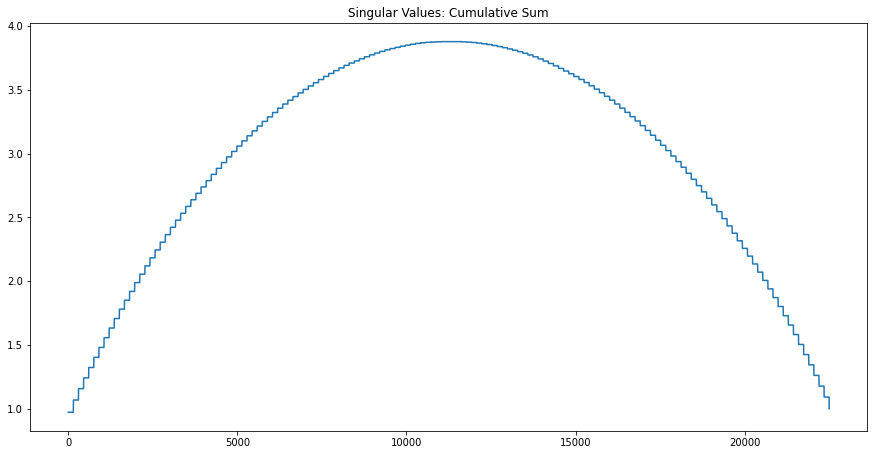

In [10]:
plt.figure(1)
plt.semilogy(np.diag(eigValues))
plt.title('Singular Values')
plt.show()

plt.figure(2)
plt.plot(np.cumsum(np.diag(eigValues))/np.sum(np.diag(eigValues)))
plt.title('Singular Values: Cumulative Sum')
plt.show()

In [11]:
r = 0
count = 0
while(r<len(eigValues)):
        if eigValues[r] < 1 and eigValues[r]>-1:
            count += 1    
        r += 1

In [12]:
print(r)
print(count)

150
2


In [13]:
r = len(eigValues)-count

In [14]:
eigVals = eigValues[:r]
D = np.diag(abs(eigVals)**(1/2))

In [15]:
Vt = eigVectors[:,:r].T

In [16]:
print(Vt.shape)

(148, 150)


In [17]:
print(X.shape)

(4096, 150)


# Reconstruction of Training data

In [18]:
Xcap = (X.dot(Vt.T)).dot(Vt)

In [19]:
print(Xcap.shape)

(4096, 150)


<ipython-input-21-cf7f4378a071>:1: ComplexWarning: Casting complex values to real discards the imaginary part
  img = plt.imshow(Xcap[:,1].reshape(64,64).T.astype('uint8'))


[]

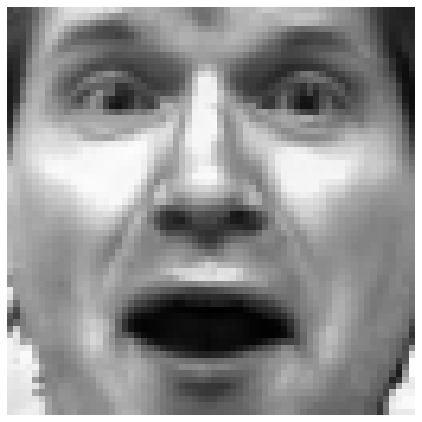

In [21]:
img = plt.imshow(Xcap[:,1].reshape(64,64).T.astype('uint8'))
img.set_cmap('gray')
plt.axis('off')
plt.plot()

# Reconstruction of Test Data
# xcap = X*V*(Σ^−2)*Vt*Xt*x

In [22]:
invD_sq = np.linalg.inv(np.matmul(D,D))

In [23]:
print(invD_sq)

[[5.21691365e-05 0.00000000e+00 0.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 5.28690840e-04 0.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 5.70019694e-04 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 ...
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 6.34605954e-04
  0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 0.00000000e+00
  6.12392830e-04 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 6.04442240e-04]]


In [24]:
print(X.shape)
print(Vt.T.shape)
print(invD_sq.shape)
print(Vt.shape)
print(X.T.shape)
print(X_test.shape)

(4096, 150)
(150, 148)
(148, 148)
(148, 150)
(150, 4096)
(4096, 15)


In [36]:
UUt = np.matmul(X,np.matmul(Vt.T,np.matmul(invD_sq,np.matmul(Vt,X.T))))

In [43]:
x = X_test
print(x.shape)

(4096, 15)


In [44]:
print(x.shape)

(4096, 15)


In [45]:
print(UUt.shape)

(4096, 4096)


In [46]:
y = np.matmul(UUt,x)

In [47]:
print(y.shape)

(4096, 15)


<ipython-input-48-b6c760e68f40>:1: ComplexWarning: Casting complex values to real discards the imaginary part
  img = plt.imshow(y[:,14].reshape(64,64).astype('uint8').T)


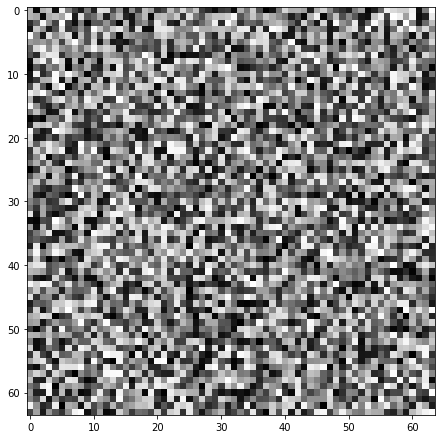

In [48]:
img = plt.imshow(y[:,14].reshape(64,64).astype('uint8').T)
img.set_cmap('gray')